In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
import seaborn as sns

In [3]:
data = np.array([[3,4],[2,8],[6,9],[10,12]])

In [5]:
data = pd.DataFrame(data, columns=['col1','col2'])

In [7]:
data

,col1,col2
0,3,4
1,2,8
2,6,9
3,10,12


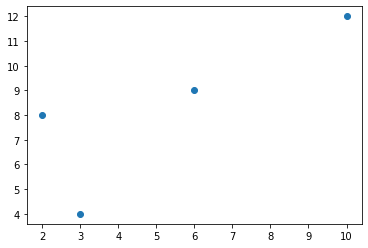

In [8]:
plt.scatter(data['col1'],data['col2'])

1. Standardization of data
2. cov matrix
3. eig value and eig vector
4. find principal component

In [18]:
meanbycol = np.mean(data,axis=0)

In [19]:
stdbycol = np.std(data,axis=0)

In [22]:
scaledbymean = data-meanbycol

In [24]:
scaled_data = scaledbymean/stdbycol

In [25]:
scaled_data

,col1,col2
0,-0.722897,-1.485297
1,-1.044185,-0.087370
2,0.240966,0.262111
3,1.526117,1.310556


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [35]:
scaled_data.cov()

,col1,col2
col1,1.333333,1.076057
col2,1.076057,1.333333


<AxesSubplot:>

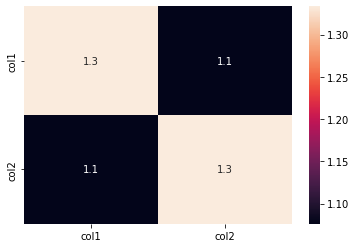

In [32]:
sns.heatmap(scaled_data.cov(),annot=True)

In [36]:
cov_mat = np.cov(scaled_data.T)

In [38]:
eig_val,eig_vec=np.linalg.eig(cov_mat)

In [ ]:
scaled_data

In [49]:
eig_vec.T.dot(scaled_data.T).T

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [50]:
np.dot(scaled_data,eig_vec)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [52]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(scaled_data)

array([[-1.56142916, -0.53909786],
       [-0.80013059,  0.67657018],
       [ 0.35572917,  0.01495207],
       [ 2.00583058, -0.15242439]])

In [53]:
pd.DataFrame(pca.fit_transform(scaled_data),columns=['pc1','pc2'])

,pc1,pc2
0,-1.561429,-0.539098
1,-0.800131,0.676570
2,0.355729,0.014952
3,2.005831,-0.152424


In [54]:
pca.inverse_transform(pca.fit_transform(scaled_data))

array([[-0.7228974 , -1.4852969 ],
       [-1.04418513, -0.08737041],
       [ 0.2409658 ,  0.26211122],
       [ 1.52611672,  1.31055608]])

In [56]:
# representation of data by principal complonents
pca.explained_variance_ratio_

array([0.90352119, 0.09647881])

In [59]:
df = pd.read_csv("https://gist.githubusercontent.com/yifancui/e1d5ce0ba59ba0c275c0e2efed542a37/raw/dde7dbca24429542ff78964b83aaf064142dd771/data.csv")

In [60]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [63]:
df = df.drop(['Id number','Type of glass'],axis=1)

In [72]:
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [76]:
pc_df=pd.DataFrame(pca.fit_transform(scaled_df))

In [77]:
pd.DataFrame(pc_df)

,0,1,2,3,4,5,6,7,8
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,-0.197160,0.016346
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,-0.284214,-0.010790
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,-0.095941,0.021640
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,-0.002959,0.092035
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,-0.191316,0.002315
...,...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,0.189401,-0.028657
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,0.131651,-0.013663
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,-0.891710,0.046284
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,0.074460,-0.027301


In [79]:
pcs = pca.explained_variance_ratio_

In [78]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.279018
1,0.227786
2,0.156094
3,0.128651
4,0.101556
5,0.058626
6,0.040995
7,0.007095
8,0.000179


In [84]:
sum(sorted(pcs,reverse=True)[:6])

0.951731087898719

In [90]:
for i in range(len(pcs)+1):
    print(sum(sorted(pcs,reverse=True)[:i]*100),i)

0 0
27.90181917945641 1
50.68039901112667 2
66.2897767220671 3
79.15491501404738 4
89.31049553766317 5
95.173108789872 6
99.27264704892754 7
99.9821242464097 8
99.99999999999996 9


higest variance in only :6 !

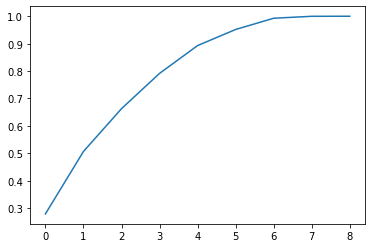

In [89]:
plt.plot(np.cumsum(pcs))
plt.show()

In [93]:
pca2 = PCA(n_components=6)
pca2_df = pd.DataFrame(pca2.fit_transform(scaled_df))
pca2_df

,0,1,2,3,4,5
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032
...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352


In [96]:
pd.DataFrame(pca2.inverse_transform(pca2_df))

,0,1,2,3,4,5,6,7,8
0,0.756527,0.323655,1.167404,-1.020026,-1.111639,-0.489667,-0.096905,-0.181896,-0.560255
1,-0.460868,0.555749,0.603108,-0.267426,-0.003657,-0.048056,-0.689062,-0.305326,-0.589453
2,-0.763955,0.199038,0.530813,-0.088240,0.488195,0.015843,-0.814594,-0.205396,-0.560601
3,-0.233127,-0.206721,0.740795,-0.330822,-0.015322,0.162222,-0.469758,-0.315736,-0.581279
4,-0.468997,-0.216473,0.669365,-0.352557,0.448999,-0.018975,-0.531360,-0.380472,-0.601220
...,...,...,...,...,...,...,...,...,...
209,-0.453527,1.110080,-2.139509,2.004474,0.295690,0.037899,-0.065905,2.215265,-0.486464
210,-0.448473,1.782118,-1.743282,1.535053,0.449490,-1.046602,-0.394949,2.625752,-0.627442
211,0.026909,0.969133,-1.768457,1.390116,0.524612,-1.189621,0.085068,2.854468,-0.649979
212,-0.611266,1.093392,-1.735661,1.483858,1.114597,-1.105102,-0.314132,2.557059,-0.635689
